In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN

In [3]:
df = pd.read_csv("Mall_Customers.csv")
print("Dataset Shape:", df.shape)
print(df.head())


Dataset Shape: (200, 5)
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
df = df.drop("CustomerID", axis=1)

In [6]:
encoder = LabelEncoder()
df["Gender"] = encoder.fit_transform(df["Gender"])

In [7]:
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

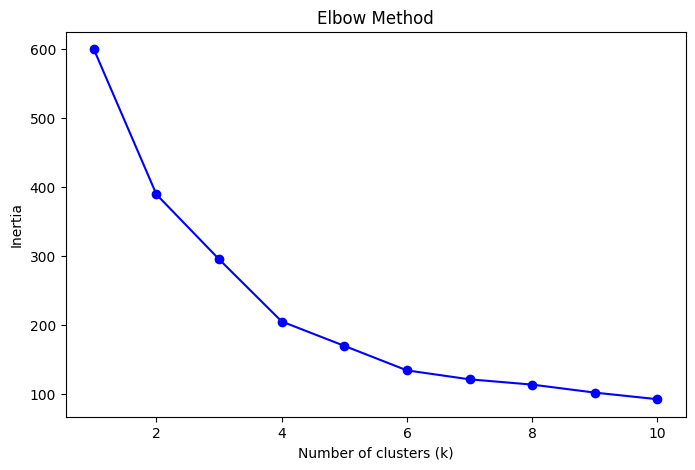

In [9]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [14]:
kmeans = KMeans(n_clusters=5, random_state=42)  # Assume k=5 from elbow
clusters = kmeans.fit_predict(X_scaled)
df["Cluster"] = clusters


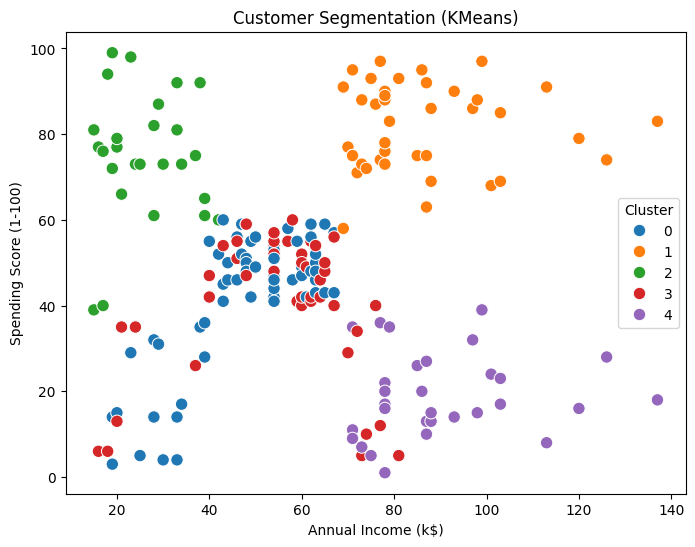

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)",
                hue="Cluster", palette="tab10", s=80)
plt.title("Customer Segmentation (KMeans)")
plt.show()

In [12]:
print(df.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean())

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 47.620690               41.706897
1                 86.100000               81.525000
2                 26.115385               74.846154
3                 54.311111               40.911111
4                 89.774194               18.483871


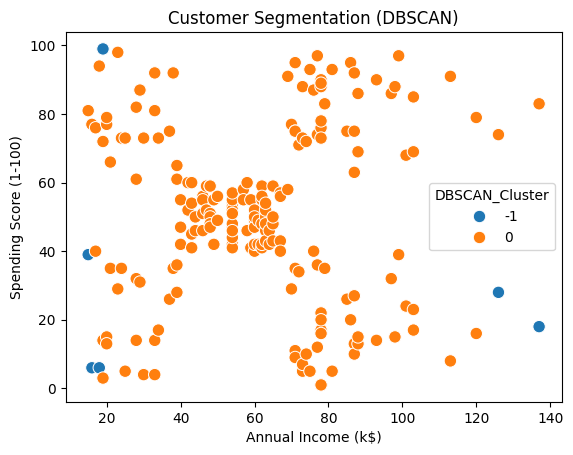

In [13]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
db_clusters = dbscan.fit_predict(X_scaled)
df["DBSCAN_Cluster"] = db_clusters

sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)",
                hue="DBSCAN_Cluster", palette="tab10", s=80)
plt.title("Customer Segmentation (DBSCAN)")
plt.show()